# Cómo crear una distribución de frecuencias con NLTK

En este cuaderno, utilizaremos NLTK para hacer:   

* Una simple distribución de frecuencias. Partiendo de un archivo de texto, utilizaremos la clase FreqDist de NLTK para calcular el número de apariciones de las 30 palabras largas (de 8 o más símbolos) que más se usan en él. 

* Una distribución condicional. Partiendo de una lista de palabras y de dos archivos de texto, utilizaremos la clase ConditionalFreqDist de NLTK para calcular las frecuencias de cada palabra para cada texto.

Por último, visualizaremos estos datos.

## Pasos previos

En este cuaderno vamos a trabajar con dos archivos de texto: copus1.txt y corpus2.txt.    

Antes de empezar a calcular frecuencias, tenemos que "extraer" el texto de cada uno de los archivos y tokenizarlo, es decir segmentarlo por palabras. Estas operaciones ya han sido comentadas en el cuaderno "POS Tagging", así que puedes consultarlo en el caso de tener alguna duda.

In [5]:
import codecs
from nltk.tokenize import word_tokenize


def extract_raw(filename):
    with codecs.open(filename, "r", "utf8") as f:
        raw = f.readlines()
    raw = ' '.join(raw)
    return raw

raw1, raw2 = extract_raw('data/corpus1.txt'), extract_raw('data/corpus2.txt')

def tokenize_low(raw):
    tokens = word_tokenize(raw)
    tokens_low = [word.lower() for word in tokens]
    return tokens_low

tokens1, tokens2 = tokenize_low(raw1), tokenize_low(raw2)

In [6]:
# Para comprobar que todo se ha tokenizado bien, imprimimos por pantalla los 30 primeros tokens de cada lista
print(tokens1[:30], '\n', tokens2[:30])

['prólogo', 'las', 'recomendaciones', 'de', 'mi', 'tía', 'úrsula', 'varias', 'veces', 'mi', 'tía', 'úrsula', 'me', 'habló', 'de', 'un', 'pariente', 'nuestro', ',', 'intrigante', 'y', 'conspirador', ',', 'enredador', 'y', 'libelista', '.', 'mi', 'tía', 'úrsula'] 
 ['prólogo', 'se', 'empeña', 'don', 'miguel', 'de', 'unamuno', 'en', 'que', 'ponga', 'yo', 'un', 'prólogo', 'a', 'este', 'su', 'libro', 'en', 'que', 'se', 'relata', 'la', 'tan', 'lamentable', 'historia', 'de', 'mi', 'buen', 'amigo', 'augusto']


## Contar apariciones de palabras

Para esta tarea, solo vamos a trabajar con la lista de tokens generada a partir del archivo corpus1.txt.

Nuestro objetivo es contar el número de apariciones de cada palabra que tenga 8 o más caracteres. Es decir, queremos crear un objeto de este formato:    
        {'revolución': 3, 'lingüística': 5, 'neologismo': 8, etc.}

La clase FreqDist de nltk, nos permite hacerlo de forma muy fácil.

In [7]:
from nltk import FreqDist

Sin embargo, primero tenemos que filtrar nuestra lista de tokens para solo dejar en ella los de 8 o más caracteres.

In [8]:
tokens_10 = [w for w in tokens2 if len(w) == 10]

# 1. for w in tokens: cogemos uno por uno los elementos de la lista "tokens", refiriéndonos a cada elemento como w.
# 2. if len(w) >= 8: evaluamos si la longitud del elemento es igual o superior a 8, si no los es lo desechamos.
# 3. [w]: guardamos los elementos no desechados en nuestra nueva lista. 

In [9]:
# Imprimimos por pantalla los 30 primeros tokens de nuestra nueva lista
print(tokens_10[:30])

['lamentable', 'misteriosa', 'escribirlo', 'hamletiano', 'existencia', 'firmemente', 'persuadido', 'psicólogos', 'escritores', 'perniciosa', 'nacimiento', 'victorcito', 'parentesco', 'doctísimas', 'ingenuidad', 'periódicos', 'provincias', 'manifiesto', 'enternecen', 'reproducen', 'manoseadas', 'atribuirse', 'amenidades', 'cuartillas', 'subrayados', 'escribiese', 'entonación', 'periódicos', 'integrismo', 'mayúsculas']


Una vez creada la lista, podemos crear la distribución de frecuencias y extraer de ella los datos que nos interesan.

In [10]:
# Creamos una distribución de frecuencias a partir de una lista de palabras de más de 8 caracteres
fdist = FreqDist(tokens_10)
fdist

FreqDist({'abalanzóse': 1,
          'abandonado': 1,
          'abnegación': 1,
          'absorberme': 1,
          'acabáramos': 1,
          'acariciaba': 3,
          'aceptación': 1,
          'acercósele': 1,
          'acompañaré': 1,
          'aconséjame': 1,
          'acostarse—': 1,
          'acostumbra': 2,
          'acostumbro': 2,
          'acurrucado': 1,
          'aficionado': 3,
          'afirmación': 2,
          'agarradero': 1,
          'agilizando': 1,
          'agitándose': 1,
          'agradecida': 1,
          'aguardarse': 1,
          'aguarda—se': 1,
          'alborozado': 1,
          'alumbrando': 1,
          'amenidades': 1,
          'anarquismo': 9,
          'anarquista': 11,
          'andróminas': 1,
          'angustiosa': 1,
          'animalidad': 1,
          'antemano—o': 1,
          'antropismo': 1,
          'anunciaron': 1,
          'anárquicas': 1,
          'apariencia': 3,
          'apechugaba': 1,
          'apetitosas': 1,


In [11]:
# Imprimimos el número total de elementos en la distribución
types = fdist.N()
print("Hay {} elementos en la distribución.".format(types))

Hay 1134 elementos en la distribución.


In [12]:
# Imprimimos el número de apariciones de la palabra "políticos"
word = "políticos"
print("La palabra '{}' aparece {} veces en el texto.".format(word, fdist[word]))

La palabra 'políticos' aparece 0 veces en el texto.


In [13]:
# Imprimimos las 30 palabras más comunes. El resultado es una lista de tuplas. En cada tupla, en primera posición
# está el elemento y en segunda el número de apariciones de éste en el texto.
top30 = fdist.most_common(30)
print(top30)

[('psicología', 20), ('diciéndose', 17), ('matrimonio', 15), ('existencia', 14), ('metafísica', 12), ('anarquista', 11), ('misteriosa', 10), ('espiritual', 10), ('conciencia', 10), ('cualquiera', 9), ('anarquismo', 9), ('diciéndole', 8), ('personajes', 7), ('entrevista', 7), ('compromiso', 7), ('resplandor', 6), ('convencido', 6), ('metafísico', 6), ('poniéndose', 5), ('levantarse', 5), ('preguntaba', 5), ('distraerse', 5), ('suicidarse', 5), ('¡admirable', 5), ('castellano', 5), ('silencioso', 5), ('encontrado', 4), ('domésticos', 4), ('augusto—le', 4), ('resignarme', 4)]


Ahora vamos a ver dos maneras de representar de forma gráfica los datos obtenidos.

Primero utilizaremos el método plot. *Para poder utiizar el método plot es necesario tener instaladas las librerías matplotlib y numpy.*

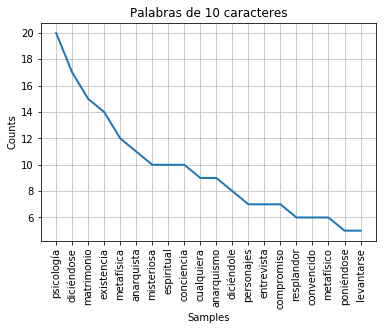

In [14]:
fdist.plot(20, title='Palabras de 10 caracteres')

También podemos sacar provecho de la librería *wordcloud* de Python para crear una nube de palabras.   

En este cuaderno no vamos a comentar el uso de esta librería, pero te animamos a que [le eches un vistazo](https://github.com/amueller/word_cloud).

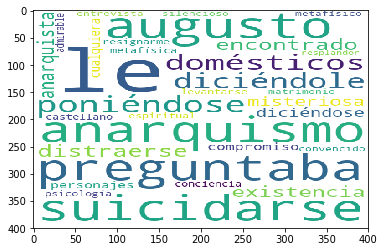

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = ' '.join(w[0] for w in top30)

wc = WordCloud(background_color="white", width=400, height=400)

wc.generate(text)

plt.imshow(wc, aspect='auto')
plt.show()

### Tarea

Representar de forma gráfica el número de apariciones de las 20 palabras de exactamente 10 caracteres, que más se usan en el archivo corpus2.txt.

*Tal vez te interese saber que en Python para evaluar si "a es igual a b" se puede usar la expresión* if a == b.

## Distribución condicional

Dada una lista de palabras, queremos comparar las frecuencias con las que estas palabras aparecen en dos textos diferentes y visualizar los resultados.   

In [16]:
# Palabras para las que queremos contar las frecuencias
words = ['vida', 'felicidad', 'peligro', 'amor', 'odio', 'muerte']

En primer lugar, queremos conseguir un objeto que tenga la siguiente estructura:

      {'text1': {'perro': 2, 'gato': 3, ....}, 'text2': {'caballo': 5, 'ave': 1, ....}}   

Para hacerlo utilizaremos la clase ConditionalFreqDist de NLTK.   

In [17]:
from nltk import ConditionalFreqDist

Para crear un objeto ConditionalFreqDist, le tenemos que pasar una lista que consiste de tuplas. El primer elemento  de cada tupla tiene que ser el nombre de la 'condición'. En nuestro caso, solo tenemos dos condiciones: 'text1' y 'text2'. El segundo elemento de cada tupla tiene que ser la propia palabra.    

       [('text1', 'perro'), (text1', 'gato')... ('text2', 'caballo'), ('text2', 'ave'), ('text2', 'pez')...]

Nuestro primer paso será crear esta lista de tuplas a partir de las dos listas de tokens (tokens1 y tokens2) que tenemos.

In [18]:
texts = [('text1', tokens1), ('text2', tokens2)]
# Esta lista solo nos sirve para vincular las condiciones ('text1', 'text2') a sus respectivas listas 
# (tokens1, tokens2).  


texts_words = [(text[0], word)
               for text in texts
               for word in text[1]
              ]

# 1. for text in texts: cogemos cada tupla de nuestra lista 'texts'
# 2. text[1]: es el segundo elemento de la tupla. En este caso, el segundo elemento siempre es una lista de tokens.
# 3. for word in text[1]: cogemos cada token de lista de tokens.
# 4. (text[0], word): Creamos una tupla que contiene el nombre de la condición ('text1' o 'text2') y la propia palabra.

In [19]:
# Para comprabar que la lista se ha creado bien, imprimiremos sus 20 primeras y 20 últimos elementos.
print(texts_words[:20], '\n\n', texts_words[-20:])

[('text1', 'prólogo'), ('text1', 'las'), ('text1', 'recomendaciones'), ('text1', 'de'), ('text1', 'mi'), ('text1', 'tía'), ('text1', 'úrsula'), ('text1', 'varias'), ('text1', 'veces'), ('text1', 'mi'), ('text1', 'tía'), ('text1', 'úrsula'), ('text1', 'me'), ('text1', 'habló'), ('text1', 'de'), ('text1', 'un'), ('text1', 'pariente'), ('text1', 'nuestro'), ('text1', ','), ('text1', 'intrigante')] 

 [('text2', 'aquel'), ('text2', 'maravilloso'), ('text2', 'ejemplo'), ('text2', 'de'), ('text2', 'lealtad'), ('text2', 'y'), ('text2', 'fidelidad'), ('text2', '.'), ('text2', 'y'), ('text2', 'dijo'), ('text2', ':'), ('text2', '—¡y'), ('text2', 'luego'), ('text2', 'dirán'), ('text2', 'que'), ('text2', 'no'), ('text2', 'matan'), ('text2', 'las'), ('text2', 'penas'), ('text2', '!')]


Ya tenemos nuestra lista de tuplas, así que podemos crear una distribución condicional.

In [20]:
cfdist = ConditionalFreqDist(texts_words)
cfdist

ConditionalFreqDist(nltk.probability.FreqDist,
                    {'text1': FreqDist({'melindres': 1,
                               'costarme': 1,
                               '¿probablemente': 1,
                               'escogían': 1,
                               'erauste': 1,
                               'dumolay': 1,
                               'completamente': 9,
                               'emplear': 2,
                               'asistió': 1,
                               'shantellerreca': 1,
                               'disparate': 2,
                               'honestas': 1,
                               'luchaban': 2,
                               'incorporarlo': 1,
                               'preocuparse': 1,
                               'juraban': 1,
                               'taberna': 7,
                               'pudieran': 1,
                               'vacilar': 1,
                               'levantó': 14,
     

Las frecuencias que aparecen en esta distribución son absolutas, es decir corresponden al número real de apariciones de cada palabra. Sin embargo, nuestros dos textos no tienen la misma longitud y por eso estas frecuencias no son directamente comparables. Lo que realmente nos interesa comparar son las frecuencias relativas.   

NLTK no permite hacer una distribución de este tipo, así que tendremos que utilizar un pequeño "hack" para conseguirlo. En este caso, queremos conseguir las frecuencias por cada 10000 tokens.

In [21]:
from copy import copy, deepcopy

rel_cfdist = deepcopy(cfdist) # Creamos una copia de la distribución condicional

# Creamos copias de cada una de las distribuciones de frecuencias
rel_fdist1 = copy(cfdist['text1'])
rel_fdist2 = copy(cfdist['text2'])

def fdist_per(fd, length, per=10000):
    """
    INPUT:
       - fd: objeto FreqDist
       - length: número total de tokens en el texto
       - per: por cada cuántos tokens queremos obtener la frecuencia relativa
    OUTPUT: nuevo objeto FreqDist con frecuencias por cada X palabras      
    """
    for key, value in fd.items():
        fd[key] = round(value / length * per, 3)
    return fd

rel_cfdist['text1'] = fdist_per(rel_fdist1, len(tokens1))
rel_cfdist['text2'] = fdist_per(rel_fdist2, len(tokens2))

rel_cfdist

ConditionalFreqDist(nltk.probability.FreqDist,
                    {'text1': FreqDist({'melindres': 0.167,
                               'estrecho': 1.669,
                               'costarme': 0.167,
                               '¿probablemente': 0.167,
                               'escogían': 0.167,
                               'dumolay': 0.167,
                               'completamente': 1.502,
                               'emplear': 0.334,
                               'asistió': 0.167,
                               'shantellerreca': 0.167,
                               'disparate': 0.334,
                               'honestas': 0.167,
                               'luchaban': 0.334,
                               'incorporarlo': 0.167,
                               'preocuparse': 0.167,
                               'juraban': 0.167,
                               'taberna': 1.168,
                               'pudieran': 0.167,
                       

Finalmente visualizaremos de forma gráfica plot.   

Ya que solo nos interesan las frecuencias de las 6 palabras almacenadas en la lista 'words', lo especificaremos en el parametro 'samples'.

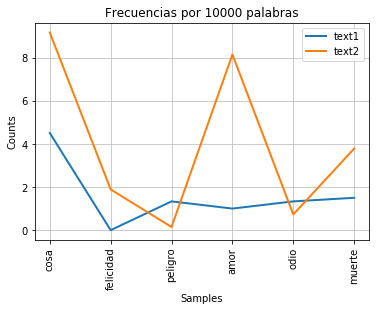

In [22]:
words = ['cosa', 'felicidad', 'peligro', 'amor', 'odio', 'muerte']
rel_cfdist.plot(samples=words, title="Frecuencias por 10000 palabras")